# LEPL1106, Devoir 1 : Introduction au traitement numérique des signaux et systèmes

## 0) Introduction

Ce premer devoir a pour objectif de vous familiariser avec le traitement numérique de signaux et systèmes en `Python`. Pour créer, stocker, et opérer sur les signaux, on utilisera le package [NumPy](http://www.numpy.org/) de Python, typiquement abrévié par `np`.  Pour afficher les signaux, on utilisera la librairie [Matplotlib](https://matplotlib.org/index.html), aussi connu sous le doux nom de `plt`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Les signaux seront stockés dans des vecteurs numpy ("numpy arrays").
On peut créer un vecteur d'indices discrets $n \in \mathbb Z$ allant de $a$ à $b$ en écrivant
`n = np.arange(a,b+1)`

In [2]:
a = -5
b = 15
n = np.arange(a,b+1)
print("indices n :",n)

indices n : [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Avec quelques autres fonctionnalités élémentaires comme `np.zeros` ou `np.ones`, on peut facilement créer des signaux "de base". Par exemple, voici une fonction qui calcule l'échelon $u[n]$ (ou, également, [Fonction de Heaviside](https://fr.wikipedia.org/wiki/Fonction_de_Heaviside)), défini comme
$$ u[n] = \begin{cases} 1 & \text{si } n \geq 0, \\ 0 & \text{sinon.} \end{cases} $$

**Remarque:**
Dans les devoirs pour ce cours, nous travaillerons surtout la *compréhension* des concepts utilisés, ainsi que la *rigeur dans la présentation* (par exemple, la création de graphes *complets* et *lisibles*). Nous ferons donc moins attention aux *détails d'implémentation* et les questions d'*efficacité* du code écrit.

Néanmoins, c'est un critère important dans le métier d'ingénieur, et nous donnerons parfois quelques conseils à ce propos. Par exemple, nous donnons trois implémentations différentes de `heaviside` (les deux premières en commentaire). La première implémentation est une implémentation typique d'étudiant, peu concise et peu efficace à cause de la boucle `for` explicite. La deuxième implémentation est un code [vectorisé](https://en.wikipedia.org/wiki/Array_programming) (qui tire profit des opérations vectorielles efficaces de numpy), beaucoup plus compact et rapide, mais est peut-être un peu plus difficile à interpréter pour un humain qui lirait le code. La troisième implémentation (non commentée) est une proposition de compromis entre l'efficacité (code vectorisé) et la lisibilité du code.

In [3]:
def heaviside(n):
    """
    Calcule la fonction échelon (Heaviside step function en anglais),
    définie comme u[n] = 1 si n >= 0, u[n] = 0 sinon.
    
    Arguments
    ---------
    n: numpy array contenant des indices (entiers) auxquels on applique la fonction échelon.
    
    Retourne
    --------
    result: numpy array de même taille contentant les valeurs u[n]
    """
    ## Version "noob"
    ## ==============
    # result = np.zeros(n.shape) # crée un array de zéros de la même taille que n
    # for i in range(n.size):    # (quelle est la différence entre "size" et "shape" ?)
    #     if n[i] >= 0:
    #         result[i] = 1.
    # return result
    
    ## Version "pro"
    ## ==============
    # return (n >= 0).astype(float)  # (n >= 0) est un array de booléens qu'on convertit en 0./1. via astype
    
    ## Version "compromis efficacité <-> interprétabilité"
    ## ==============
    result = np.zeros(n.shape) 
    result[n >= 0] = 1.        # modifie "result" aux indices où "n>=0" vaut "True"
    return result
    

# On applique la fonction à notre vecteur n calculé plus haut
u = heaviside(n)
print("échelon appliqué aux indices n :",u)

échelon appliqué aux indices n : [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Remarquez le [docstring](https://realpython.com/documenting-python-code/#documenting-your-python-code-base-using-docstrings) (le commentaire entre triple guillemets qui suit la définition de la fonction) qui sert à documenter l'usage de la fonction. On peut ainsi accéder à cette documentation en tapant `help(nomDeLaFonction)` (essayez par vous-mêmes avec quelques fonction de numpy, par exemple !).

Dans ce cours, nous vous demanderons d'écrire un docstring *structuré* et *rigoureux* pour toutes les fonctions que vous créerez. C'est une bonne habitude à entrainer.

In [4]:
help(heaviside)

Help on function heaviside in module __main__:

heaviside(n)
    Calcule la fonction échelon (Heaviside step function en anglais),
    définie comme u[n] = 1 si n >= 0, u[n] = 0 sinon.
    
    Arguments
    ---------
    n: numpy array contenant des indices (entiers) auxquels on applique la fonction échelon.
    
    Retourne
    --------
    result: numpy array de même taille contentant les valeurs u[n]



Voici finalement une démo de quelques fonctionalités de matplotlib (c'est juste un exemple, pas un template à copier-coller sans réfléchir). **Nous vous encourageons à explorer les possibilités de cette librairie au maximum et de ne pas vous contenter du minimum syndical.** Faire des graphes de qualité est une compétence qui vous servira dans pratiquement tous vos cours (et après).

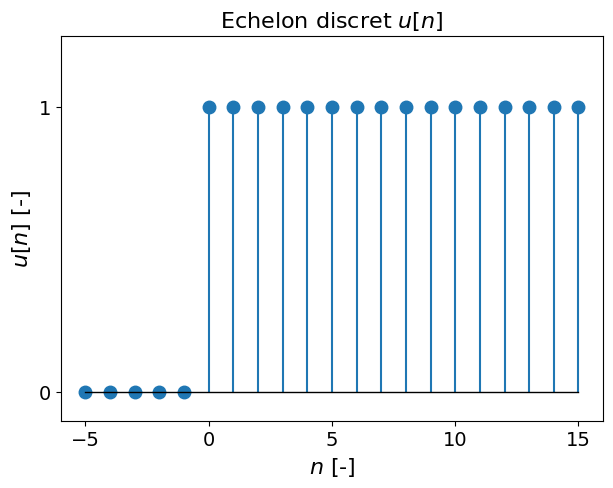

In [5]:
# Creation de ma figure en précisant la taille
plt.figure(figsize=(7,5))

## LES INDISPENSABLES

# On récupère les différentes composantes du plot (markerline, stemlines, baseline) pour les modifier par après
markerline, stemlines, baseline = plt.stem(n,u)

# Axes
fs_text = 16 # Taille du texte
plt.xlabel("$n$ [-]", fontsize=fs_text)
plt.ylabel("$u[n]$ [-]", fontsize=fs_text)

# Titre
plt.title("Echelon discret $u[n]$", fontsize=fs_text)

## LES TOUCHES BONUS
effectuer_touches_bonus = True # Essayez de passer ceci en "False" pour voir la différence
if effectuer_touches_bonus:
    # Gestion de la "baseline" (axe horizontal)
    baseline.set_color('k')   # Baseline noir (par défaut c'est rouge, pas très beau)
    baseline.set_linewidth(1) # Diminuer la largeur de la baseline (par défaut = 2), un peu imposante par défaut
    
    # Gestion des "markerlines" ("bouboules")
    markerline.set_markersize(9) # On grossit un peu pour mettre en évidence la forme du signal
    
    # "De-zoomer" l'axe y pour être moins écrasés
    plt.ylim((-0.1,1.25))
    
    # Gestion des 'ticks' (valeurs chiffrées attachées aux axes)
    fs_ticks = 14 # Taille des chiffres (un peu petits par défaut)
    # En x, on demande de mettre un "tick" tous les multiples de 5 (par défaut ici c'était tous les multiples de 2.5)
    # mais vu que n est un entier, ça a peu de sens d'afficher des valeurs non-entières !
    plt.xticks(n[::5],fontsize=fs_ticks)
    # En y, comme il n'y a que deux valeurs possibles (0 et 1), on n'affiche que ces valeurs-là
    plt.yticks([0,1],fontsize=fs_ticks)
    

# Affichage de la figure
plt.show()

*Passons maintenant à quelques exercices.*

## 1) Créer un signal (fenêtre temporelle en temps discret)

On vous demande d'écrire une fonction `window(n,n0,n1)` qui calcule la "fênetre temporelle" en temps discret entre $n_0$ et $n_1 > n_0$, et d'amplitude $A$.

$$ w[n] = A\cdot(u[n - n_0] - u[n - n_1]) = \begin{cases} A & \text{si } n_0 \leq n < n_1, \\ 0 & \text{sinon.}  \end{cases} $$

N'oubliez pas (comme pour toutes les fonctions que vous écrirez) de compléter le "docstring" de la fonction.

In [32]:
# LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
def window(n,n0,n1,A):
    """
    input:
    n = un numpy array contenant les indexes qu'on veut avoir en window
    n0 = le début de la fenêtre
    n1 = la fin de la fenêtre
    A = l'indice qui multiplie la formule
    result:
    le résultat de la fonction window
    """
    result = np.zeros(n.size)
    begin = n[0]
    end = n[-1]
    
    arrn0 = np.arange(begin-n0, end-n0)
    arrn1 = np.arange(begin-n1, end-n1)
    
    heavn0 = np.zeros(arrn0.shape) 
    heavn0[arrn0 >= 0] = 1.        # modifie "result" aux indices où "n>=0" vaut "True"
    
    heavn1 = np.zeros(arrn1.shape) 
    heavn1[arrn1 >= 0] = 1.        # modifie "result" aux indices où "n>=0" vaut "True"
    
    
    for index in range(begin, end+1):
        result[index] = A * (heavn0[index] - heavn1[index])
    
    # A COMPLETER

    return result


In [33]:
# Test
n0 = 3
n1 = 8
A = 4
print("Indices n testés : ",n)
print("Fenetre obtenue  : ",window(n,n0,n1,A))


Indices n testés :  [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fenetre obtenue  :  [0. 0. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0.]


## 2) Création d'une figure

Complétez la fonction `plotWindow(n,w,name)`, qui crée et sauvegarde un graphe du signal "fenêtre discrète" `w` entre `n0` et `n1` calculé sur les indices `n` (on suppose donc que `w = window(n,n0,n1,A)`, calculé au préalable). Indiquez les paramètres `n0`, `n1` et `A` visuellement sur le graphe. La figure obtenue est sauvegardé au format `png` portant le nom `name`; la sauvegarde est déjà implémentée pour vous (quand vous testez votre fonction "en local", vous pouvez remplacer cette ligne par `plt.show()`, mais n'oubliez pas de re-remplacer par la sauvegarde avant de soumettre sur inginious !). Vous pouvez vous baser sur l'exemple de code ci-dessus. 

In [34]:
# LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS

def plotWindow(n,w,name):
    """
    input:
    n = les absisces  --> ici les points où on effectue la fonction fenêtre
    w = les ordonnées --> ici notre le résultat de la fonction window
    """
    
    # Création de la figure, de taille fixe.
    fig = plt.figure(figsize=(6,3))
    ax = fig.add_subplot(111)
    
    # A MODIFIER : créez ici votre plot
    markerline, stemlines, baseline = plt.stem(n,w)
    plt.xlabel("$n$ [-]")
    plt.ylabel("$w[n]$ [-]")
    plt.title("Fenêtre discret w[n]")
    
    plt.xticks(n[::5]) #met les valeurs tous les 5 unités
    plt.yticks([0,np.max(w)]) #affiche 0 et la valeur max en ordonnée
    
    baseline.set_color('k')
    
    temp = w[::-1] #renverse le numpy array window pour trouver n1
    
    n0 = ax.plot(w[np.argmax(w>=np.max(w))] - 1,0, 'x', markersize=10, color="red", label="n0") #mets une croix au n0
    n1 = ax.plot(int(len(temp)-np.argmax(w>=np.max(temp)))+n[0],0, 'x', markersize=10, color="red", label="n1") #mets une croix au n1
    
    ax.legend()
    #plt.plot([w.get(np.max(w))])
    # Sauvegarde de la figure avec le bon nom.
    # Le second argument rétrécit les marges, par défaut relativement larges.
    plt.savefig(name + '.png', bbox_inches='tight', dpi=200)
    
    plt.show() # De-commentez ceci pour tester "localement", ne pas inclure cette ligne sur Inginious !

    return


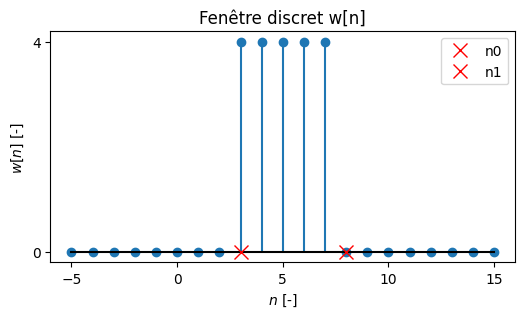

In [35]:
# Test
plotWindow(n,window(n,n0,n1,A),"test_figure_devoir_01")